In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from pickle import dump
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
%matplotlib inline
sns.set_style('darkgrid')

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_final = pd.read_csv("G:/SJU/BDA2022_Sem3/Research/Final_Dataset.csv")
df_final.head()

,Age,Sex,BMI,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,CurrentSmoker,Diabetes,TotalChol,SysBP,DiaBP,HeartRate,LDL
0,22,Male,23.3,92,41,84,No MetSyn,0,0,195,106.0,70.0,80,70
1,44,Female,23.2,82,28,56,No MetSyn,0,0,250,121.0,81.0,95,166
2,21,Male,20.1,107,43,78,No MetSyn,1,0,245,127.5,80.0,75,124
3,43,Female,33.3,104,73,141,No MetSyn,1,0,225,150.0,95.0,65,11
4,51,Male,20.1,95,43,126,No MetSyn,1,0,285,130.0,84.0,85,116


In [3]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2375 non-null   int64  
 1   Sex                2375 non-null   object 
 2   BMI                2375 non-null   float64
 3   BloodGlucose       2375 non-null   int64  
 4   HDL                2375 non-null   int64  
 5   Triglycerides      2375 non-null   int64  
 6   MetabolicSyndrome  2375 non-null   object 
 7   CurrentSmoker      2375 non-null   int64  
 8   Diabetes           2375 non-null   int64  
 9   TotalChol          2375 non-null   int64  
 10  SysBP              2375 non-null   float64
 11  DiaBP              2375 non-null   float64
 12  HeartRate          2375 non-null   int64  
 13  LDL                2375 non-null   int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 259.9+ KB


In [4]:
df_final['MetabolicSyndrome'].unique()

array(['No MetSyn', 'MetSyn'], dtype=object)

In [5]:
# Replace values at once using a dictionary
replace = {'No MetSyn': '0', 'MetSyn': '1'}
df_final['MetabolicSyndrome'] = df_final['MetabolicSyndrome'].replace(replace)

df_final.head()


,Age,Sex,BMI,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,CurrentSmoker,Diabetes,TotalChol,SysBP,DiaBP,HeartRate,LDL
0,22,Male,23.3,92,41,84,0,0,0,195,106.0,70.0,80,70
1,44,Female,23.2,82,28,56,0,0,0,250,121.0,81.0,95,166
2,21,Male,20.1,107,43,78,0,1,0,245,127.5,80.0,75,124
3,43,Female,33.3,104,73,141,0,1,0,225,150.0,95.0,65,11
4,51,Male,20.1,95,43,126,0,1,0,285,130.0,84.0,85,116


In [6]:
df_final['MetabolicSyndrome'] = df_final['MetabolicSyndrome'].astype(int)

In [7]:
df_final['MetabolicSyndrome'].unique()

array([0, 1])

In [8]:
# Replace values at once using a dictionary
replace = {'Male': '0', 'Female': '1'}
df_final['Sex'] = df_final['Sex'].replace(replace)

df_final.head()

,Age,Sex,BMI,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,CurrentSmoker,Diabetes,TotalChol,SysBP,DiaBP,HeartRate,LDL
0,22,0,23.3,92,41,84,0,0,0,195,106.0,70.0,80,70
1,44,1,23.2,82,28,56,0,0,0,250,121.0,81.0,95,166
2,21,0,20.1,107,43,78,0,1,0,245,127.5,80.0,75,124
3,43,1,33.3,104,73,141,0,1,0,225,150.0,95.0,65,11
4,51,0,20.1,95,43,126,0,1,0,285,130.0,84.0,85,116


In [9]:
df_final['Sex'] = df_final['Sex'].astype(int)

In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2375 non-null   int64  
 1   Sex                2375 non-null   int32  
 2   BMI                2375 non-null   float64
 3   BloodGlucose       2375 non-null   int64  
 4   HDL                2375 non-null   int64  
 5   Triglycerides      2375 non-null   int64  
 6   MetabolicSyndrome  2375 non-null   int32  
 7   CurrentSmoker      2375 non-null   int64  
 8   Diabetes           2375 non-null   int64  
 9   TotalChol          2375 non-null   int64  
 10  SysBP              2375 non-null   float64
 11  DiaBP              2375 non-null   float64
 12  HeartRate          2375 non-null   int64  
 13  LDL                2375 non-null   int64  
dtypes: float64(3), int32(2), int64(9)
memory usage: 241.3 KB


In [11]:
df_corr=df_final.corr()

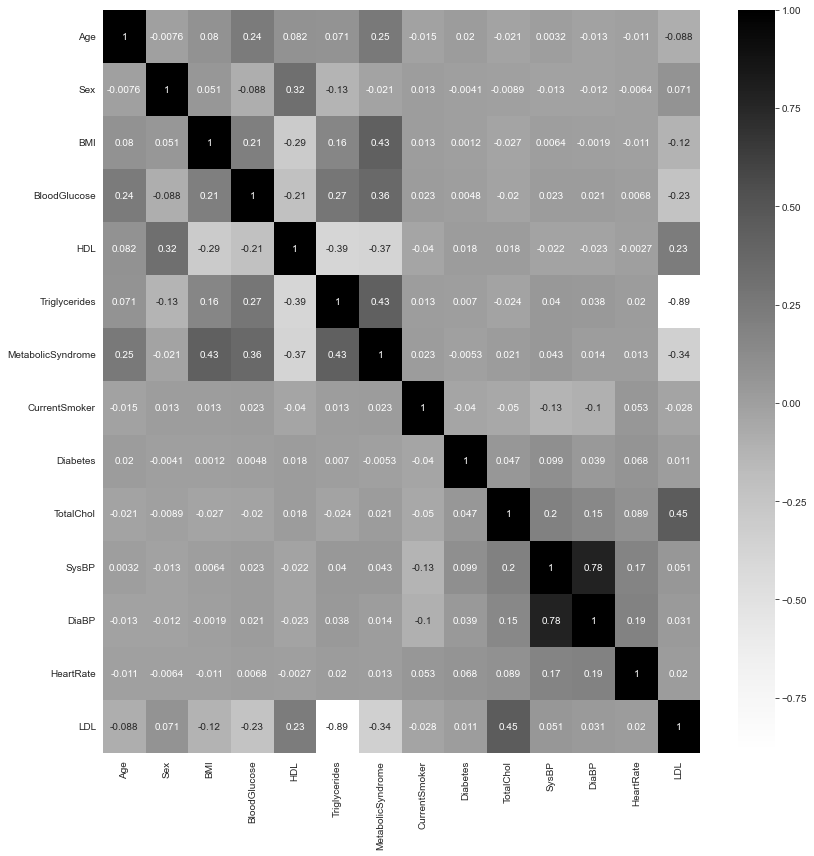

In [12]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_corr, annot=True, cmap='Greys');
plt.tight_layout()

In [13]:
# Create a new column 'heart_disease' based on cholesterol ranges
df_final['Heart_Disease'] = '0'  # Initialize the column with 'No'

# Define criteria for heart disease based on cholesterol values
# You can customize these thresholds as needed for your specific criteria
ldl_threshold = 100
hdl_threshold = 50
total_cholesterol_threshold = 240
triglycerides_threshold = 150

# Update the 'heart_disease' column based on criteria
df_final.loc[(df_final['LDL'] > ldl_threshold) | (df_final['HDL'] < hdl_threshold) |
       (df_final['TotalChol'] > total_cholesterol_threshold) |
       (df_final['Triglycerides'] > triglycerides_threshold), 'Heart_Disease'] = '1'

# Display the updated DataFrame
df_final.head()


,Age,Sex,BMI,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,CurrentSmoker,Diabetes,TotalChol,SysBP,DiaBP,HeartRate,LDL,Heart_Disease
0,22,0,23.3,92,41,84,0,0,0,195,106.0,70.0,80,70,1
1,44,1,23.2,82,28,56,0,0,0,250,121.0,81.0,95,166,1
2,21,0,20.1,107,43,78,0,1,0,245,127.5,80.0,75,124,1
3,43,1,33.3,104,73,141,0,1,0,225,150.0,95.0,65,11,0
4,51,0,20.1,95,43,126,0,1,0,285,130.0,84.0,85,116,1


In [14]:
df_final['Heart_Disease'] = df_final['Heart_Disease'].astype(int)

In [15]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2375 non-null   int64  
 1   Sex                2375 non-null   int32  
 2   BMI                2375 non-null   float64
 3   BloodGlucose       2375 non-null   int64  
 4   HDL                2375 non-null   int64  
 5   Triglycerides      2375 non-null   int64  
 6   MetabolicSyndrome  2375 non-null   int32  
 7   CurrentSmoker      2375 non-null   int64  
 8   Diabetes           2375 non-null   int64  
 9   TotalChol          2375 non-null   int64  
 10  SysBP              2375 non-null   float64
 11  DiaBP              2375 non-null   float64
 12  HeartRate          2375 non-null   int64  
 13  LDL                2375 non-null   int64  
 14  Heart_Disease      2375 non-null   int32  
dtypes: float64(3), int32(3), int64(9)
memory usage: 250.6 KB


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Step 1: Load and preprocess your data
# Assuming you have your data loaded into a DataFrame called 'data'
# Make sure 'target' is the target variable column (0 for not affected, 1 for affected)
# Separate features (X) and target (y)
X = df_final.drop(['Heart_Disease'], axis=1)
y = df_final['Heart_Disease']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Step 3: Fit a logistic regression model
#logreg_model = LogisticRegression()
logReg_model = LogisticRegression()  # Increase the number of iterations
logReg_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = logReg_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(confusion_mat)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.8542105263157894
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.55      0.64       454
           1       0.87      0.95      0.91      1446

    accuracy                           0.85      1900
   macro avg       0.82      0.75      0.78      1900
weighted avg       0.85      0.85      0.85      1900

Confusion Matrix:
[[ 250  204]
 [  73 1373]]


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming you have your data loaded into a DataFrame called 'data'
# Make sure 'target' is the target variable column (0 for not affected, 1 for affected)
# Separate features (X) and target (y)
X = df_final.drop(['Heart_Disease'], axis=1)
y = df_final['Heart_Disease']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Build a neural network tailored for your clinical data
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # Add dropout for regularization
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(confusion_mat)


Epoch 1/20
15/15 - 2s - loss: 0.7370 - accuracy: 0.4779 - 2s/epoch - 152ms/step
Epoch 2/20
15/15 - 0s - loss: 0.5539 - accuracy: 0.7663 - 143ms/epoch - 10ms/step
Epoch 3/20
15/15 - 0s - loss: 0.4847 - accuracy: 0.7874 - 85ms/epoch - 6ms/step
Epoch 4/20
15/15 - 0s - loss: 0.4339 - accuracy: 0.8042 - 117ms/epoch - 8ms/step
Epoch 5/20
15/15 - 0s - loss: 0.3894 - accuracy: 0.8358 - 84ms/epoch - 6ms/step
Epoch 6/20
15/15 - 0s - loss: 0.3760 - accuracy: 0.8442 - 132ms/epoch - 9ms/step
Epoch 7/20
15/15 - 0s - loss: 0.3619 - accuracy: 0.8358 - 108ms/epoch - 7ms/step
Epoch 8/20
15/15 - 0s - loss: 0.3203 - accuracy: 0.8653 - 84ms/epoch - 6ms/step
Epoch 9/20
15/15 - 0s - loss: 0.3083 - accuracy: 0.8695 - 117ms/epoch - 8ms/step
Epoch 10/20
15/15 - 0s - loss: 0.2832 - accuracy: 0.8758 - 91ms/epoch - 6ms/step
Epoch 11/20
15/15 - 0s - loss: 0.2898 - accuracy: 0.8758 - 174ms/epoch - 12ms/step
Epoch 12/20
15/15 - 0s - loss: 0.2749 - accuracy: 0.8884 - 103ms/epoch - 7ms/step
Epoch 13/20
15/15 - 0s - los

In [21]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
X_train=st_x.fit_transform(X_train)
X_test=st_x.transform(X_test)

Percentage of Heart Disease 'Yes': 76.42%
Percentage of Heart Disease 'No': 23.58%


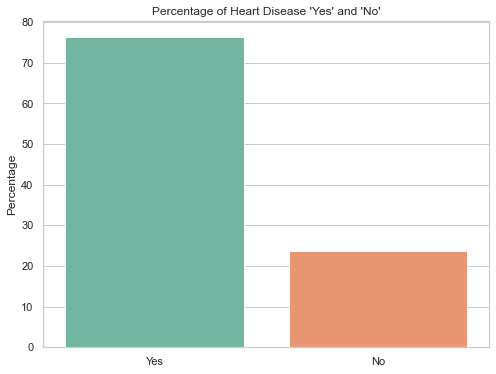

In [22]:
# Assuming you have a DataFrame called 'data' with the 'target' column

# Calculate the percentage of heart disease 'Yes' (1) and 'No' (0)
heart_disease_counts = df_final['Heart_Disease'].value_counts()
total_samples = len(df_final)

percentage_yes = (heart_disease_counts[1] / total_samples) * 100
percentage_no = (heart_disease_counts[0] / total_samples) * 100

print(f"Percentage of Heart Disease 'Yes': {percentage_yes:.2f}%")
print(f"Percentage of Heart Disease 'No': {percentage_no:.2f}%")

# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=['Yes', 'No'], y=[percentage_yes, percentage_no], palette="Set2")
plt.title("Percentage of Heart Disease 'Yes' and 'No'")
plt.ylabel("Percentage")
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



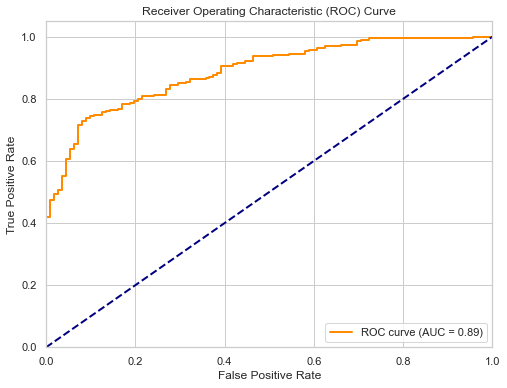

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc

X = df_final.drop(columns=['Heart_Disease'])
y = df_final['Heart_Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [24]:
df_final.head()

,Age,Sex,BMI,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,CurrentSmoker,Diabetes,TotalChol,SysBP,DiaBP,HeartRate,LDL,Heart_Disease
0,22,0,23.3,92,41,84,0,0,0,195,106.0,70.0,80,70,1
1,44,1,23.2,82,28,56,0,0,0,250,121.0,81.0,95,166,1
2,21,0,20.1,107,43,78,0,1,0,245,127.5,80.0,75,124,1
3,43,1,33.3,104,73,141,0,1,0,225,150.0,95.0,65,11,0
4,51,0,20.1,95,43,126,0,1,0,285,130.0,84.0,85,116,1


In [25]:
df_final['Heart_Disease'].unique()

array([1, 0])

In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2375 non-null   int64  
 1   Sex                2375 non-null   int32  
 2   BMI                2375 non-null   float64
 3   BloodGlucose       2375 non-null   int64  
 4   HDL                2375 non-null   int64  
 5   Triglycerides      2375 non-null   int64  
 6   MetabolicSyndrome  2375 non-null   int32  
 7   CurrentSmoker      2375 non-null   int64  
 8   Diabetes           2375 non-null   int64  
 9   TotalChol          2375 non-null   int64  
 10  SysBP              2375 non-null   float64
 11  DiaBP              2375 non-null   float64
 12  HeartRate          2375 non-null   int64  
 13  LDL                2375 non-null   int64  
 14  Heart_Disease      2375 non-null   int32  
dtypes: float64(3), int32(3), int64(9)
memory usage: 250.6 KB


In [27]:
df_no = df_final[df_final['Heart_Disease'] == 0]
df_no.head()

,Age,Sex,BMI,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,CurrentSmoker,Diabetes,TotalChol,SysBP,DiaBP,HeartRate,LDL,Heart_Disease
3,43,1,33.3,104,73,141,0,1,0,225,150.0,95.0,65,11,0
15,65,1,26.7,161,52,79,1,1,0,221,140.0,90.0,95,90,0
18,29,1,27.2,84,56,121,0,1,0,195,122.0,84.5,75,18,0
21,48,1,33.2,99,59,122,0,0,0,185,123.5,77.5,70,4,0
31,64,1,25.6,91,85,88,0,1,0,226,115.0,85.5,75,53,0


In [28]:
df_no["If_LDL"] = df_final["LDL"].apply(lambda x: x+100)
df_no.head()

,Age,Sex,BMI,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,CurrentSmoker,Diabetes,TotalChol,SysBP,DiaBP,HeartRate,LDL,Heart_Disease,If_LDL
3,43,1,33.3,104,73,141,0,1,0,225,150.0,95.0,65,11,0,111
15,65,1,26.7,161,52,79,1,1,0,221,140.0,90.0,95,90,0,190
18,29,1,27.2,84,56,121,0,1,0,195,122.0,84.5,75,18,0,118
21,48,1,33.2,99,59,122,0,0,0,185,123.5,77.5,70,4,0,104
31,64,1,25.6,91,85,88,0,1,0,226,115.0,85.5,75,53,0,153


In [29]:
df_no["Chances_Of_CVD"] = df_no["If_LDL"].apply(lambda x: "Have Chances" if 130 <= x <= 190 else "No Chance")


In [30]:
df_no.head()

,Age,Sex,BMI,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,CurrentSmoker,Diabetes,TotalChol,SysBP,DiaBP,HeartRate,LDL,Heart_Disease,If_LDL,Chances_Of_CVD
3,43,1,33.3,104,73,141,0,1,0,225,150.0,95.0,65,11,0,111,No Chance
15,65,1,26.7,161,52,79,1,1,0,221,140.0,90.0,95,90,0,190,Have Chances
18,29,1,27.2,84,56,121,0,1,0,195,122.0,84.5,75,18,0,118,No Chance
21,48,1,33.2,99,59,122,0,0,0,185,123.5,77.5,70,4,0,104,No Chance
31,64,1,25.6,91,85,88,0,1,0,226,115.0,85.5,75,53,0,153,Have Chances


In [31]:
# Replace values at once using a dictionary
replace = {'No Chance': '0', 'Have Chances': '1'}
df_no['Chances_Of_CVD'] = df_no['Chances_Of_CVD'].replace(replace)

df_no.head()

,Age,Sex,BMI,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,CurrentSmoker,Diabetes,TotalChol,SysBP,DiaBP,HeartRate,LDL,Heart_Disease,If_LDL,Chances_Of_CVD
3,43,1,33.3,104,73,141,0,1,0,225,150.0,95.0,65,11,0,111,0
15,65,1,26.7,161,52,79,1,1,0,221,140.0,90.0,95,90,0,190,1
18,29,1,27.2,84,56,121,0,1,0,195,122.0,84.5,75,18,0,118,0
21,48,1,33.2,99,59,122,0,0,0,185,123.5,77.5,70,4,0,104,0
31,64,1,25.6,91,85,88,0,1,0,226,115.0,85.5,75,53,0,153,1


In [32]:
df_no['Chances_Of_CVD'] = df_no['Chances_Of_CVD'].astype(int)

In [33]:
df_no["If_HDL"] = df_final["HDL"].apply(lambda x: x-30)
df_no.head()

,Age,Sex,BMI,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,CurrentSmoker,Diabetes,TotalChol,SysBP,DiaBP,HeartRate,LDL,Heart_Disease,If_LDL,Chances_Of_CVD,If_HDL
3,43,1,33.3,104,73,141,0,1,0,225,150.0,95.0,65,11,0,111,0,43
15,65,1,26.7,161,52,79,1,1,0,221,140.0,90.0,95,90,0,190,1,22
18,29,1,27.2,84,56,121,0,1,0,195,122.0,84.5,75,18,0,118,0,26
21,48,1,33.2,99,59,122,0,0,0,185,123.5,77.5,70,4,0,104,0,29
31,64,1,25.6,91,85,88,0,1,0,226,115.0,85.5,75,53,0,153,1,55


In [34]:
df_no["If_Trigly"] = df_final["Triglycerides"].apply(lambda x: x+100)
df_no.head()

,Age,Sex,BMI,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,CurrentSmoker,Diabetes,TotalChol,SysBP,DiaBP,HeartRate,LDL,Heart_Disease,If_LDL,Chances_Of_CVD,If_HDL,If_Trigly
3,43,1,33.3,104,73,141,0,1,0,225,150.0,95.0,65,11,0,111,0,43,241
15,65,1,26.7,161,52,79,1,1,0,221,140.0,90.0,95,90,0,190,1,22,179
18,29,1,27.2,84,56,121,0,1,0,195,122.0,84.5,75,18,0,118,0,26,221
21,48,1,33.2,99,59,122,0,0,0,185,123.5,77.5,70,4,0,104,0,29,222
31,64,1,25.6,91,85,88,0,1,0,226,115.0,85.5,75,53,0,153,1,55,188


In [35]:
df_no["If_TotalChol"] = df_final["TotalChol"].apply(lambda x: x+100)
df_no.head()

,Age,Sex,BMI,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,CurrentSmoker,Diabetes,TotalChol,SysBP,DiaBP,HeartRate,LDL,Heart_Disease,If_LDL,Chances_Of_CVD,If_HDL,If_Trigly,If_TotalChol
3,43,1,33.3,104,73,141,0,1,0,225,150.0,95.0,65,11,0,111,0,43,241,325
15,65,1,26.7,161,52,79,1,1,0,221,140.0,90.0,95,90,0,190,1,22,179,321
18,29,1,27.2,84,56,121,0,1,0,195,122.0,84.5,75,18,0,118,0,26,221,295
21,48,1,33.2,99,59,122,0,0,0,185,123.5,77.5,70,4,0,104,0,29,222,285
31,64,1,25.6,91,85,88,0,1,0,226,115.0,85.5,75,53,0,153,1,55,188,326


In [36]:
df_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 3 to 2370
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                560 non-null    int64  
 1   Sex                560 non-null    int32  
 2   BMI                560 non-null    float64
 3   BloodGlucose       560 non-null    int64  
 4   HDL                560 non-null    int64  
 5   Triglycerides      560 non-null    int64  
 6   MetabolicSyndrome  560 non-null    int32  
 7   CurrentSmoker      560 non-null    int64  
 8   Diabetes           560 non-null    int64  
 9   TotalChol          560 non-null    int64  
 10  SysBP              560 non-null    float64
 11  DiaBP              560 non-null    float64
 12  HeartRate          560 non-null    int64  
 13  LDL                560 non-null    int64  
 14  Heart_Disease      560 non-null    int32  
 15  If_LDL             560 non-null    int64  
 16  Chances_Of_CVD     560 no

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define feature columns (excluding the target 'Chances_Of_CVD' and any other non-predictive columns)
feature_cols = ['Age', 'Sex', 'BMI', 'BloodGlucose', 'HDL', 'Triglycerides', 'MetabolicSyndrome', 'CurrentSmoker', 'Diabetes', 'TotalChol', 'SysBP', 'DiaBP', 'HeartRate', 'LDL', 'If_LDL']

# Define the target variable
target_col = 'Chances_Of_CVD'

# Split the dataset into features (X) and the target variable (y)
X = df_no[feature_cols]
y = df_no[target_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but can improve model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.63      0.73        62
           1       0.81      0.94      0.87       106

    accuracy                           0.83       168
   macro avg       0.84      0.79      0.80       168
weighted avg       0.83      0.83      0.82       168



In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define feature columns (excluding the target 'Chances_Of_CVD' and any other non-predictive columns)
feature_cols = ['Age', 'Sex', 'BMI', 'BloodGlucose', 'HDL', 'Triglycerides', 'MetabolicSyndrome', 'CurrentSmoker', 'Diabetes', 'TotalChol', 'SysBP', 'DiaBP', 'HeartRate', 'LDL', 'If_LDL']

# Define the target variable
target_col = 'Chances_Of_CVD'

# Assuming you have your data loaded into a DataFrame called 'data'
# Make sure 'target' is the target variable column (0 for not affected, 1 for affected)
# Separate features (X) and target (y)
X = df_no[feature_cols]
y = df_no[target_col]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Build a neural network tailored for your clinical data
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # Add dropout for regularization
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=70, batch_size=32, verbose=2)

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(confusion_mat)

Epoch 1/70
4/4 - 3s - loss: 0.7078 - accuracy: 0.5357 - 3s/epoch - 641ms/step
Epoch 2/70
4/4 - 0s - loss: 0.6712 - accuracy: 0.5625 - 78ms/epoch - 19ms/step
Epoch 3/70
4/4 - 0s - loss: 0.6074 - accuracy: 0.7411 - 43ms/epoch - 11ms/step
Epoch 4/70
4/4 - 0s - loss: 0.5844 - accuracy: 0.7679 - 54ms/epoch - 13ms/step
Epoch 5/70
4/4 - 0s - loss: 0.5248 - accuracy: 0.8214 - 57ms/epoch - 14ms/step
Epoch 6/70
4/4 - 0s - loss: 0.5263 - accuracy: 0.8482 - 58ms/epoch - 15ms/step
Epoch 7/70
4/4 - 0s - loss: 0.4847 - accuracy: 0.8571 - 86ms/epoch - 22ms/step
Epoch 8/70
4/4 - 0s - loss: 0.4757 - accuracy: 0.8661 - 30ms/epoch - 8ms/step
Epoch 9/70
4/4 - 0s - loss: 0.4523 - accuracy: 0.8929 - 59ms/epoch - 15ms/step
Epoch 10/70
4/4 - 0s - loss: 0.4353 - accuracy: 0.9107 - 33ms/epoch - 8ms/step
Epoch 11/70
4/4 - 0s - loss: 0.4108 - accuracy: 0.8661 - 50ms/epoch - 13ms/step
Epoch 12/70
4/4 - 0s - loss: 0.4159 - accuracy: 0.8839 - 52ms/epoch - 13ms/step
Epoch 13/70
4/4 - 0s - loss: 0.3810 - accuracy: 0.92

Percentage of Heart Disease 'Yes': 65.71%
Percentage of Heart Disease 'No': 34.29%


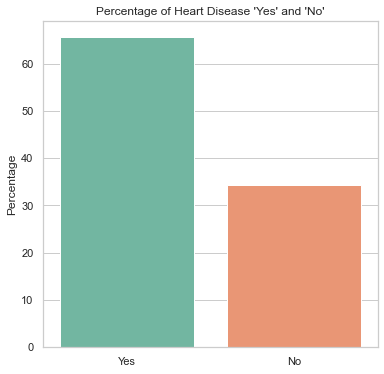

In [105]:
# Assuming you have a DataFrame called 'data' with the 'target' column

# Calculate the percentage of heart disease 'Yes' (1) and 'No' (0)
heart_disease_count = df_no['Chances_Of_CVD'].value_counts()
total_samples = len(df_no)

percentage_yes = (heart_disease_count[1] / total_samples) * 100
percentage_no = (heart_disease_count[0] / total_samples) * 100

print(f"Percentage of Heart Disease 'Yes': {percentage_yes:.2f}%")
print(f"Percentage of Heart Disease 'No': {percentage_no:.2f}%")

# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.barplot(x=['Yes', 'No'], y=[percentage_yes, percentage_no], palette="Set2")
plt.title("Percentage of Heart Disease 'Yes' and 'No'")
plt.ylabel("Percentage")
plt.show()


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



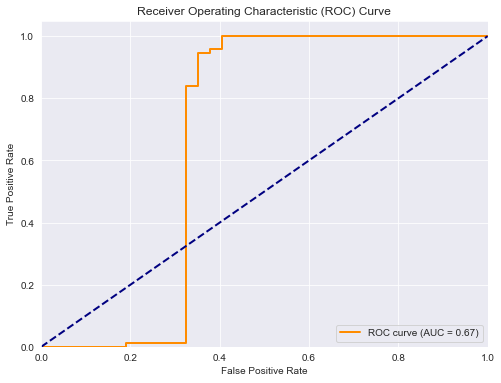

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc

X = df_no.drop(columns=['Chances_Of_CVD'])
y = df_no['Chances_Of_CVD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [89]:
df_yes = df_no[df_no['Chances_Of_CVD'] == 1]
df_yes.head()

,Age,Sex,BMI,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,CurrentSmoker,Diabetes,TotalChol,SysBP,DiaBP,HeartRate,LDL,Heart_Disease,If_LDL,Chances_Of_CVD,If_HDL,If_Trigly,If_TotalChol
15,65,1,26.7,161,52,79,1,1,0,221,140.0,90.0,95,90,0,190,1,22,179,321
31,64,1,25.6,91,85,88,0,1,0,226,115.0,85.5,75,53,0,153,1,55,188,326
33,29,0,20.1,95,53,63,0,1,0,175,134.0,82.5,72,59,0,159,1,23,163,275
37,47,1,34.0,223,51,93,1,0,1,178,160.0,98.0,75,34,0,134,1,21,193,278
44,38,1,31.9,95,57,117,0,0,0,208,96.0,63.0,65,34,0,134,1,27,217,308


In [90]:
df_yes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 15 to 2370
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                368 non-null    int64  
 1   Sex                368 non-null    int32  
 2   BMI                368 non-null    float64
 3   BloodGlucose       368 non-null    int64  
 4   HDL                368 non-null    int64  
 5   Triglycerides      368 non-null    int64  
 6   MetabolicSyndrome  368 non-null    int32  
 7   CurrentSmoker      368 non-null    int64  
 8   Diabetes           368 non-null    int64  
 9   TotalChol          368 non-null    int64  
 10  SysBP              368 non-null    float64
 11  DiaBP              368 non-null    float64
 12  HeartRate          368 non-null    int64  
 13  LDL                368 non-null    int64  
 14  Heart_Disease      368 non-null    int32  
 15  If_LDL             368 non-null    int64  
 16  Chances_Of_CVD     368 n

In [91]:
# Define a function to categorize heart diseases based on conditions
def categorize_heart_disease(row):
    if (
        row['If_LDL'] > 190 and
        ((row['Sex'] == 0 and row['If_HDL'] < 40) or (row['Sex'] == 1 and row['If_HDL'] < 50)) and
        row['If_Trigly'] > 150 and
        row['If_TotalChol'] > 200
    ):
        return 'Coronary Heart Disease'
    elif row['If_LDL'] > 160:
        return 'Atherosclerosis'
    elif row['If_LDL'] > 160 or row['If_Trigly'] > 200:
        return 'Hyperlipidemia'
    elif ((row['Sex'] == 0 and row['If_HDL'] < 40) or (row['Sex'] == 1 and row['If_HDL'] < 50)):
        return 'Hypoalphalipoproteinemia'
    else:
        return 'None'  # No specific heart disease based on conditions

In [92]:
# Apply the function to create the 'Type_of_Heart_Disease' column
df_yes['Risk_Types_Of_CVD'] = df_yes.apply(categorize_heart_disease, axis=1)

# Print the DataFrame to verify the new column
df_yes.head()

,Age,Sex,BMI,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,CurrentSmoker,Diabetes,TotalChol,...,DiaBP,HeartRate,LDL,Heart_Disease,If_LDL,Chances_Of_CVD,If_HDL,If_Trigly,If_TotalChol,Risk_Types_Of_CVD
15,65,1,26.7,161,52,79,1,1,0,221,...,90.0,95,90,0,190,1,22,179,321,Atherosclerosis
31,64,1,25.6,91,85,88,0,1,0,226,...,85.5,75,53,0,153,1,55,188,326,None
33,29,0,20.1,95,53,63,0,1,0,175,...,82.5,72,59,0,159,1,23,163,275,Hypoalphalipoproteinemia
37,47,1,34.0,223,51,93,1,0,1,178,...,98.0,75,34,0,134,1,21,193,278,Hypoalphalipoproteinemia
44,38,1,31.9,95,57,117,0,0,0,208,...,63.0,65,34,0,134,1,27,217,308,Hyperlipidemia


In [93]:
df_yes['Risk_Types_Of_CVD'].unique()

array(['Atherosclerosis', 'None', 'Hypoalphalipoproteinemia',
       'Hyperlipidemia'], dtype=object)

In [94]:
df_yes['If_LDL'].unique()

array([190, 153, 159, 134, 182, 143, 164, 189, 171, 185, 170, 179, 150,
       136, 157, 174, 178, 169, 152, 131, 135, 168, 142, 154, 149, 155,
       162, 141, 140, 151, 177, 133, 161, 163, 166, 148, 147, 139, 180,
       138, 188, 156, 176, 183, 132, 175, 172, 160, 146, 165, 137, 145,
       186, 158, 187, 173, 130, 181, 184, 144, 167], dtype=int64)

In [95]:
df_yes['If_Trigly'].unique()

array([179, 188, 163, 193, 217, 208, 205, 165, 198, 162, 161, 195, 166,
       164, 180, 229, 209, 186, 160, 191, 219, 204, 192, 189, 247, 203,
       194, 226, 177, 176, 228, 181, 197, 169, 178, 154, 238, 171, 158,
       146, 230, 190, 174, 183, 199, 170, 175, 211, 224, 173, 200, 167,
       185, 150, 214, 210, 184, 131, 152, 137, 222, 151, 155, 172, 237,
       216, 196, 182, 207, 212, 225, 168, 153, 187, 241, 215, 218, 227,
       201, 139, 221, 249, 206, 156, 213, 157, 202, 141, 135, 159, 231,
       145], dtype=int64)

In [96]:
df_yes

,Age,Sex,BMI,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,CurrentSmoker,Diabetes,TotalChol,...,DiaBP,HeartRate,LDL,Heart_Disease,If_LDL,Chances_Of_CVD,If_HDL,If_Trigly,If_TotalChol,Risk_Types_Of_CVD
15,65,1,26.7,161,52,79,1,1,0,221,...,90.0,95,90,0,190,1,22,179,321,Atherosclerosis
31,64,1,25.6,91,85,88,0,1,0,226,...,85.5,75,53,0,153,1,55,188,326,None
33,29,0,20.1,95,53,63,0,1,0,175,...,82.5,72,59,0,159,1,23,163,275,Hypoalphalipoproteinemia
37,47,1,34.0,223,51,93,1,0,1,178,...,98.0,75,34,0,134,1,21,193,278,Hypoalphalipoproteinemia
44,38,1,31.9,95,57,117,0,0,0,208,...,63.0,65,34,0,134,1,27,217,308,Hyperlipidemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,59,0,22.5,93,74,56,0,0,0,189,...,88.0,60,59,0,159,1,44,156,289,None
2343,52,1,34.8,84,51,94,0,0,0,210,...,81.0,67,65,0,165,1,21,194,310,Atherosclerosis
2358,32,0,27.3,98,53,86,0,0,0,205,...,95.0,100,66,0,166,1,23,186,305,Atherosclerosis
2365,61,0,26.8,95,61,51,0,0,0,196,...,88.0,75,84,0,184,1,31,151,296,Atherosclerosis


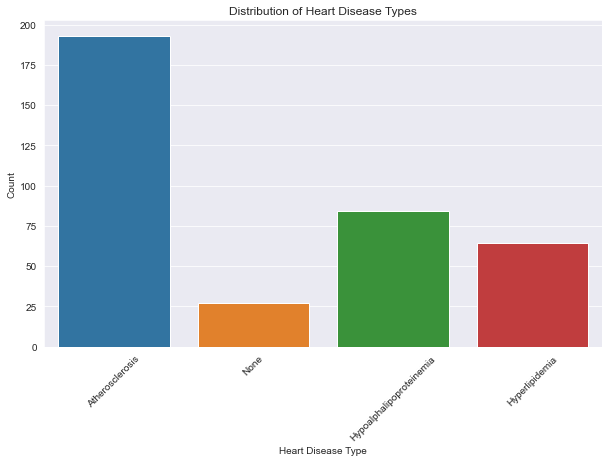

In [97]:
# Assuming you have a DataFrame 'df' with a column 'Type_of_Heart_Disease'
# Create a bar plot to visualize the distribution of heart disease types
plt.figure(figsize=(10, 6))
sns.countplot(data=df_yes, x='Risk_Types_Of_CVD')
plt.title('Distribution of Heart Disease Types')
plt.xlabel('Heart Disease Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Atherosclerosis is caused due to LDL level greater than 160mg/dL
Hypoalphalipoproteinemia is caused due to lower level of HDL i.e below 40mg/dL in men and below 50mg/dL in women

In [98]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [99]:
X = df_final.drop('Heart_Disease', axis=1)
y = df_final['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train an SVM model on the training data
clf = svm.SVC(kernel='linear', C=1)  # You can choose a different kernel and C value as needed
clf.fit(X_train, y_train)

# Step 5: Make predictions on the testing data
y_pred = clf.predict(X_test)

# Step 6: Calculate and display the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 82.74%
